In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\PRANAY\Documents\FULL STACK DATA SCIENCE jigsaw document\data science projects\wine datasets\wineQualityReds.csv',index_col=0)

In [3]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [5]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

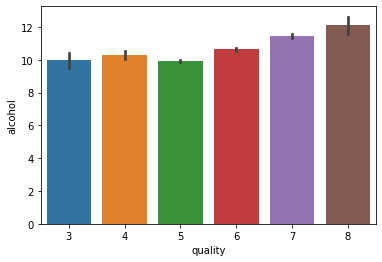

In [6]:
sns.barplot(x='quality',y='alcohol', data=df)

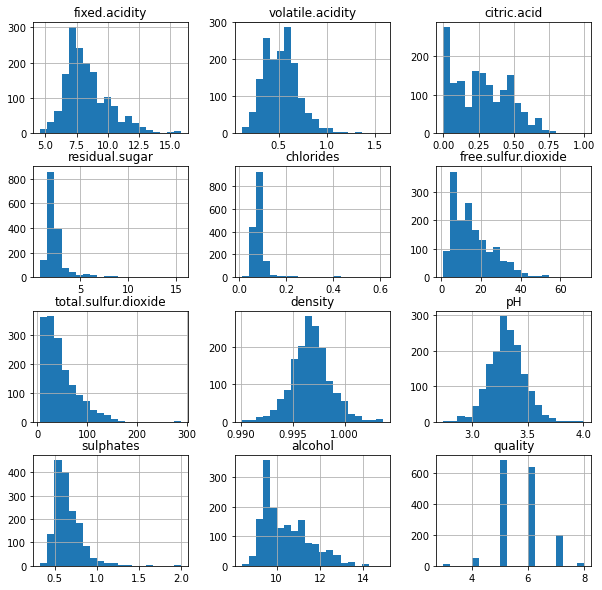

In [15]:
df.hist(bins=20,figsize=(10,10))
plt.show()

In [30]:
df['quality']=df['quality'].apply(lambda x:1 if x > 5 else 0)

<AxesSubplot:>

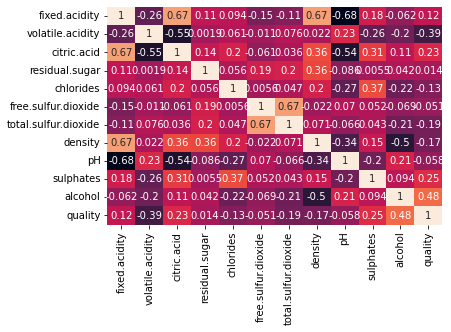

In [23]:
sns.heatmap(df.corr(),annot=True, cbar=False)

In [29]:
df=df.drop('total.sulfur.dioxide',axis=1)

In [33]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,0
2,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,0
3,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,0
4,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,0


In [32]:
df.replace({'white': 1, 'red': 0}, inplace=True)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [35]:
X=df.drop('quality',axis=1)
y=df['quality']

In [36]:
df.shape

(1599, 11)

In [41]:
print(y.shape)

(1599,)


In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [44]:
X_train.shape

(1119, 10)

In [46]:
y_test.shape

(480,)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [49]:
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)

In [50]:
X_train_scaler

array([[ 1.69536131e-01, -1.72107140e+00,  4.59303345e-01, ...,
         1.01180685e+00,  1.22661179e+00,  5.50057013e-01],
       [ 2.44606730e+00, -4.01957443e-01,  1.84105501e+00, ...,
        -2.10687612e+00,  1.22661179e+00, -2.05174641e-01],
       [-6.47680186e-01,  3.77472102e-02, -1.28054303e-03, ...,
         4.92026353e-01,  2.97270776e-01,  5.50057013e-01],
       ...,
       [-6.47680186e-01,  4.77451864e-01, -1.07597628e+00, ...,
         1.27169710e+00, -6.90154049e-01, -8.66002338e-01],
       [-2.39072027e-01, -1.83099757e+00,  4.08127357e-01, ...,
         3.72184202e-02,  8.20025095e-01,  1.39969262e+00],
       [-1.46489650e+00, -1.33632983e+00, -5.24565306e-02, ...,
         4.92026353e-01, -6.90154049e-01,  2.91015593e+00]])

In [51]:
X_test_scaler

array([[-0.35581722,  0.14767337, -0.97362431, ..., -0.48256207,
         0.00685171, -0.77159838],
       [-0.29744462, -0.18210512, -0.51304042, ...,  0.49202635,
        -1.03865693, -0.86600234],
       [ 1.39536061,  0.75226727, -0.25716048, ..., -0.22267183,
         1.86553373, -0.48838651],
       ...,
       [-0.93954316, -0.40195744, -0.15480851, ...,  0.49202635,
        -0.34165117,  0.17244119],
       [ 1.27861542, -0.12714203,  1.892231  , ..., -1.4571505 ,
         0.00685171,  1.30528867],
       [ 0.92837985, -0.18210512, -0.15480851, ...,  0.16716354,
        -0.80632167, -0.39398255]])

In [55]:
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [57]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
 
for i in range(3):
    models[i].fit(X_train, y_train)
 
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict(X_train)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        y_test, models[i].predict(X_test)))
    print()

C:\Users\PRANAY\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training Accuracy :  0.7483377531803682
Validation Accuracy :  0.7182571081922245

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.818510312813209

SVC() : 
Training Accuracy :  0.7136611706829624
Validation Accuracy :  0.6883473123384503



In [59]:
print(metrics.classification_report(y_test,models[i].predict(X_test)))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68       213
           1       0.77      0.61      0.68       267

    accuracy                           0.68       480
   macro avg       0.69      0.69      0.68       480
weighted avg       0.70      0.68      0.68       480



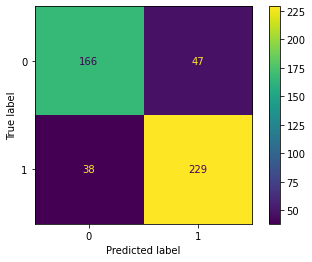

In [66]:

metrics.plot_confusion_matrix(models[1], X_test, y_test)
plt.show()